In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [18]:
df = pd.read_csv('./heart_disease_data.csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


In [19]:
df.shape

(303, 14)

heart disease dataset contain 14 columns and 303 raws

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [22]:
df.isnull().sum() / df.shape[0]

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

There are no missing values in the dataset

In [23]:
df.duplicated().sum()

1

There are only one duplicate value in this dataset

In [24]:
df.drop_duplicates(inplace = True)

In [25]:
df.shape

(302, 14)

After dropping the duplicate values, Dataset contain 302 raws.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


There are some outliers in this dataset.

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


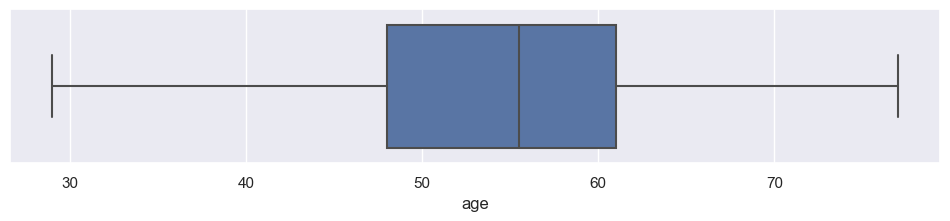

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


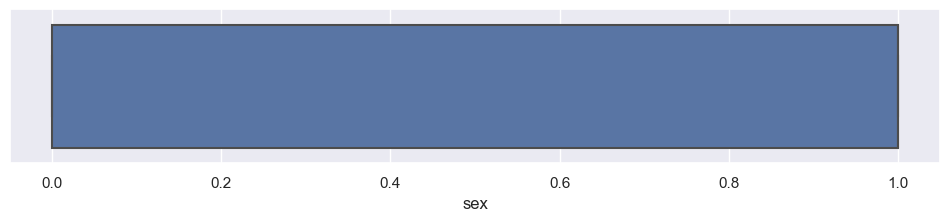

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


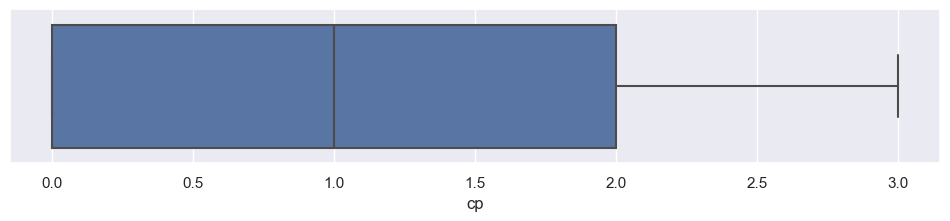

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


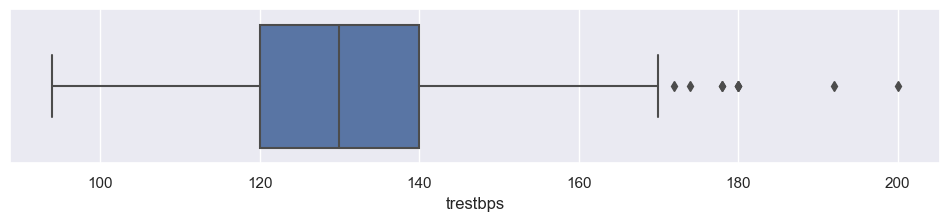

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


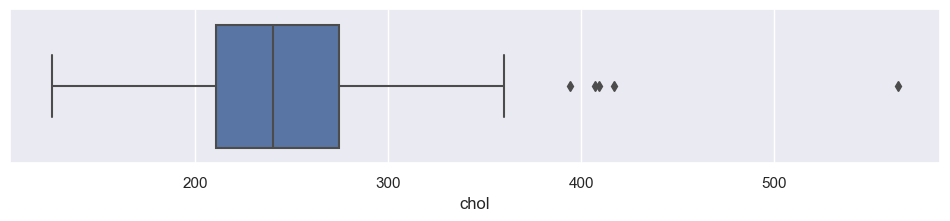

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


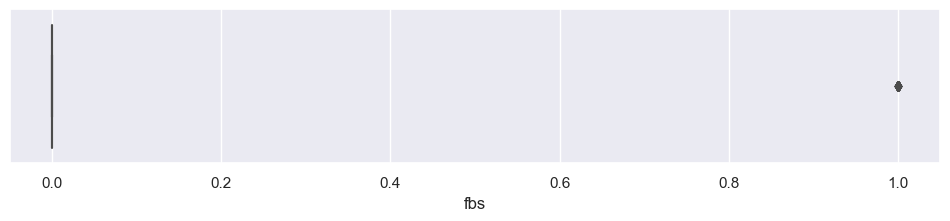

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


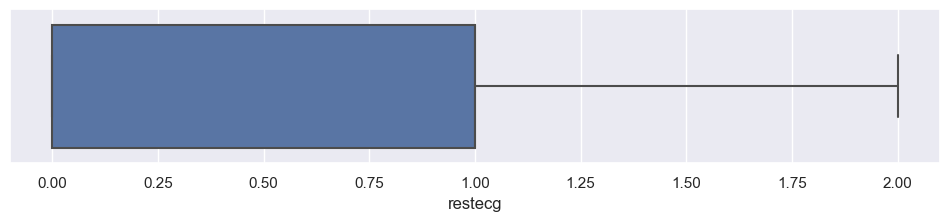

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


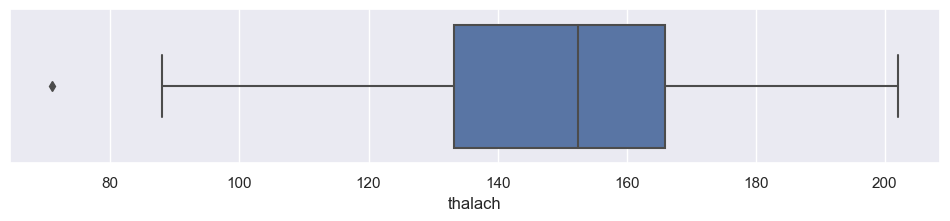

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


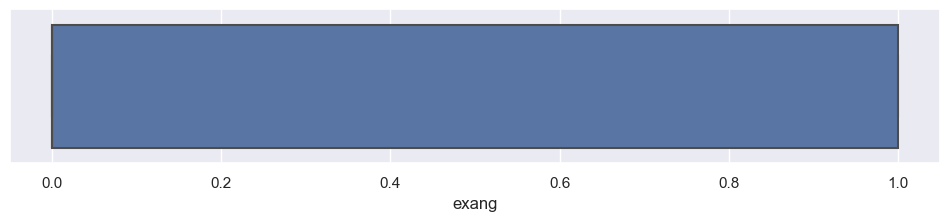

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


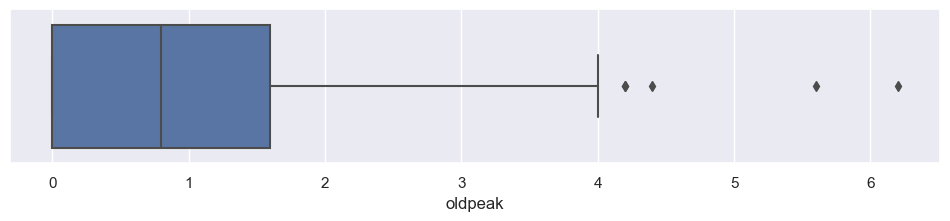

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


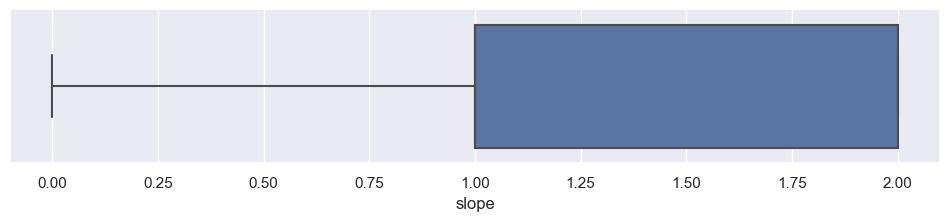

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


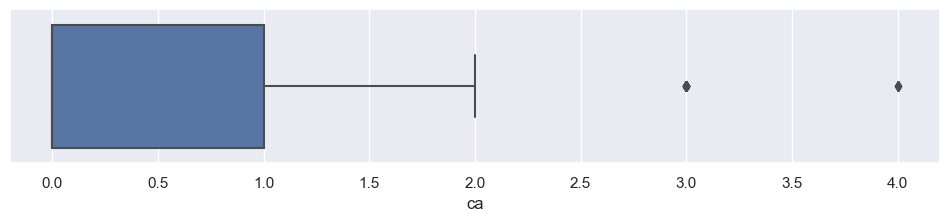

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


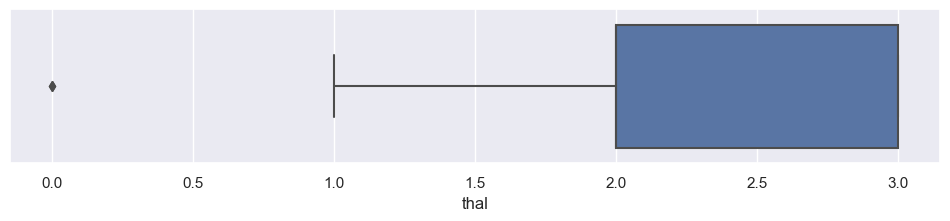

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


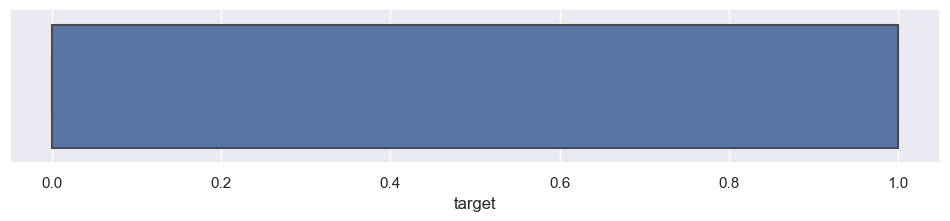

In [28]:
y = df.columns

for x in y:
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(df[x])
    plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

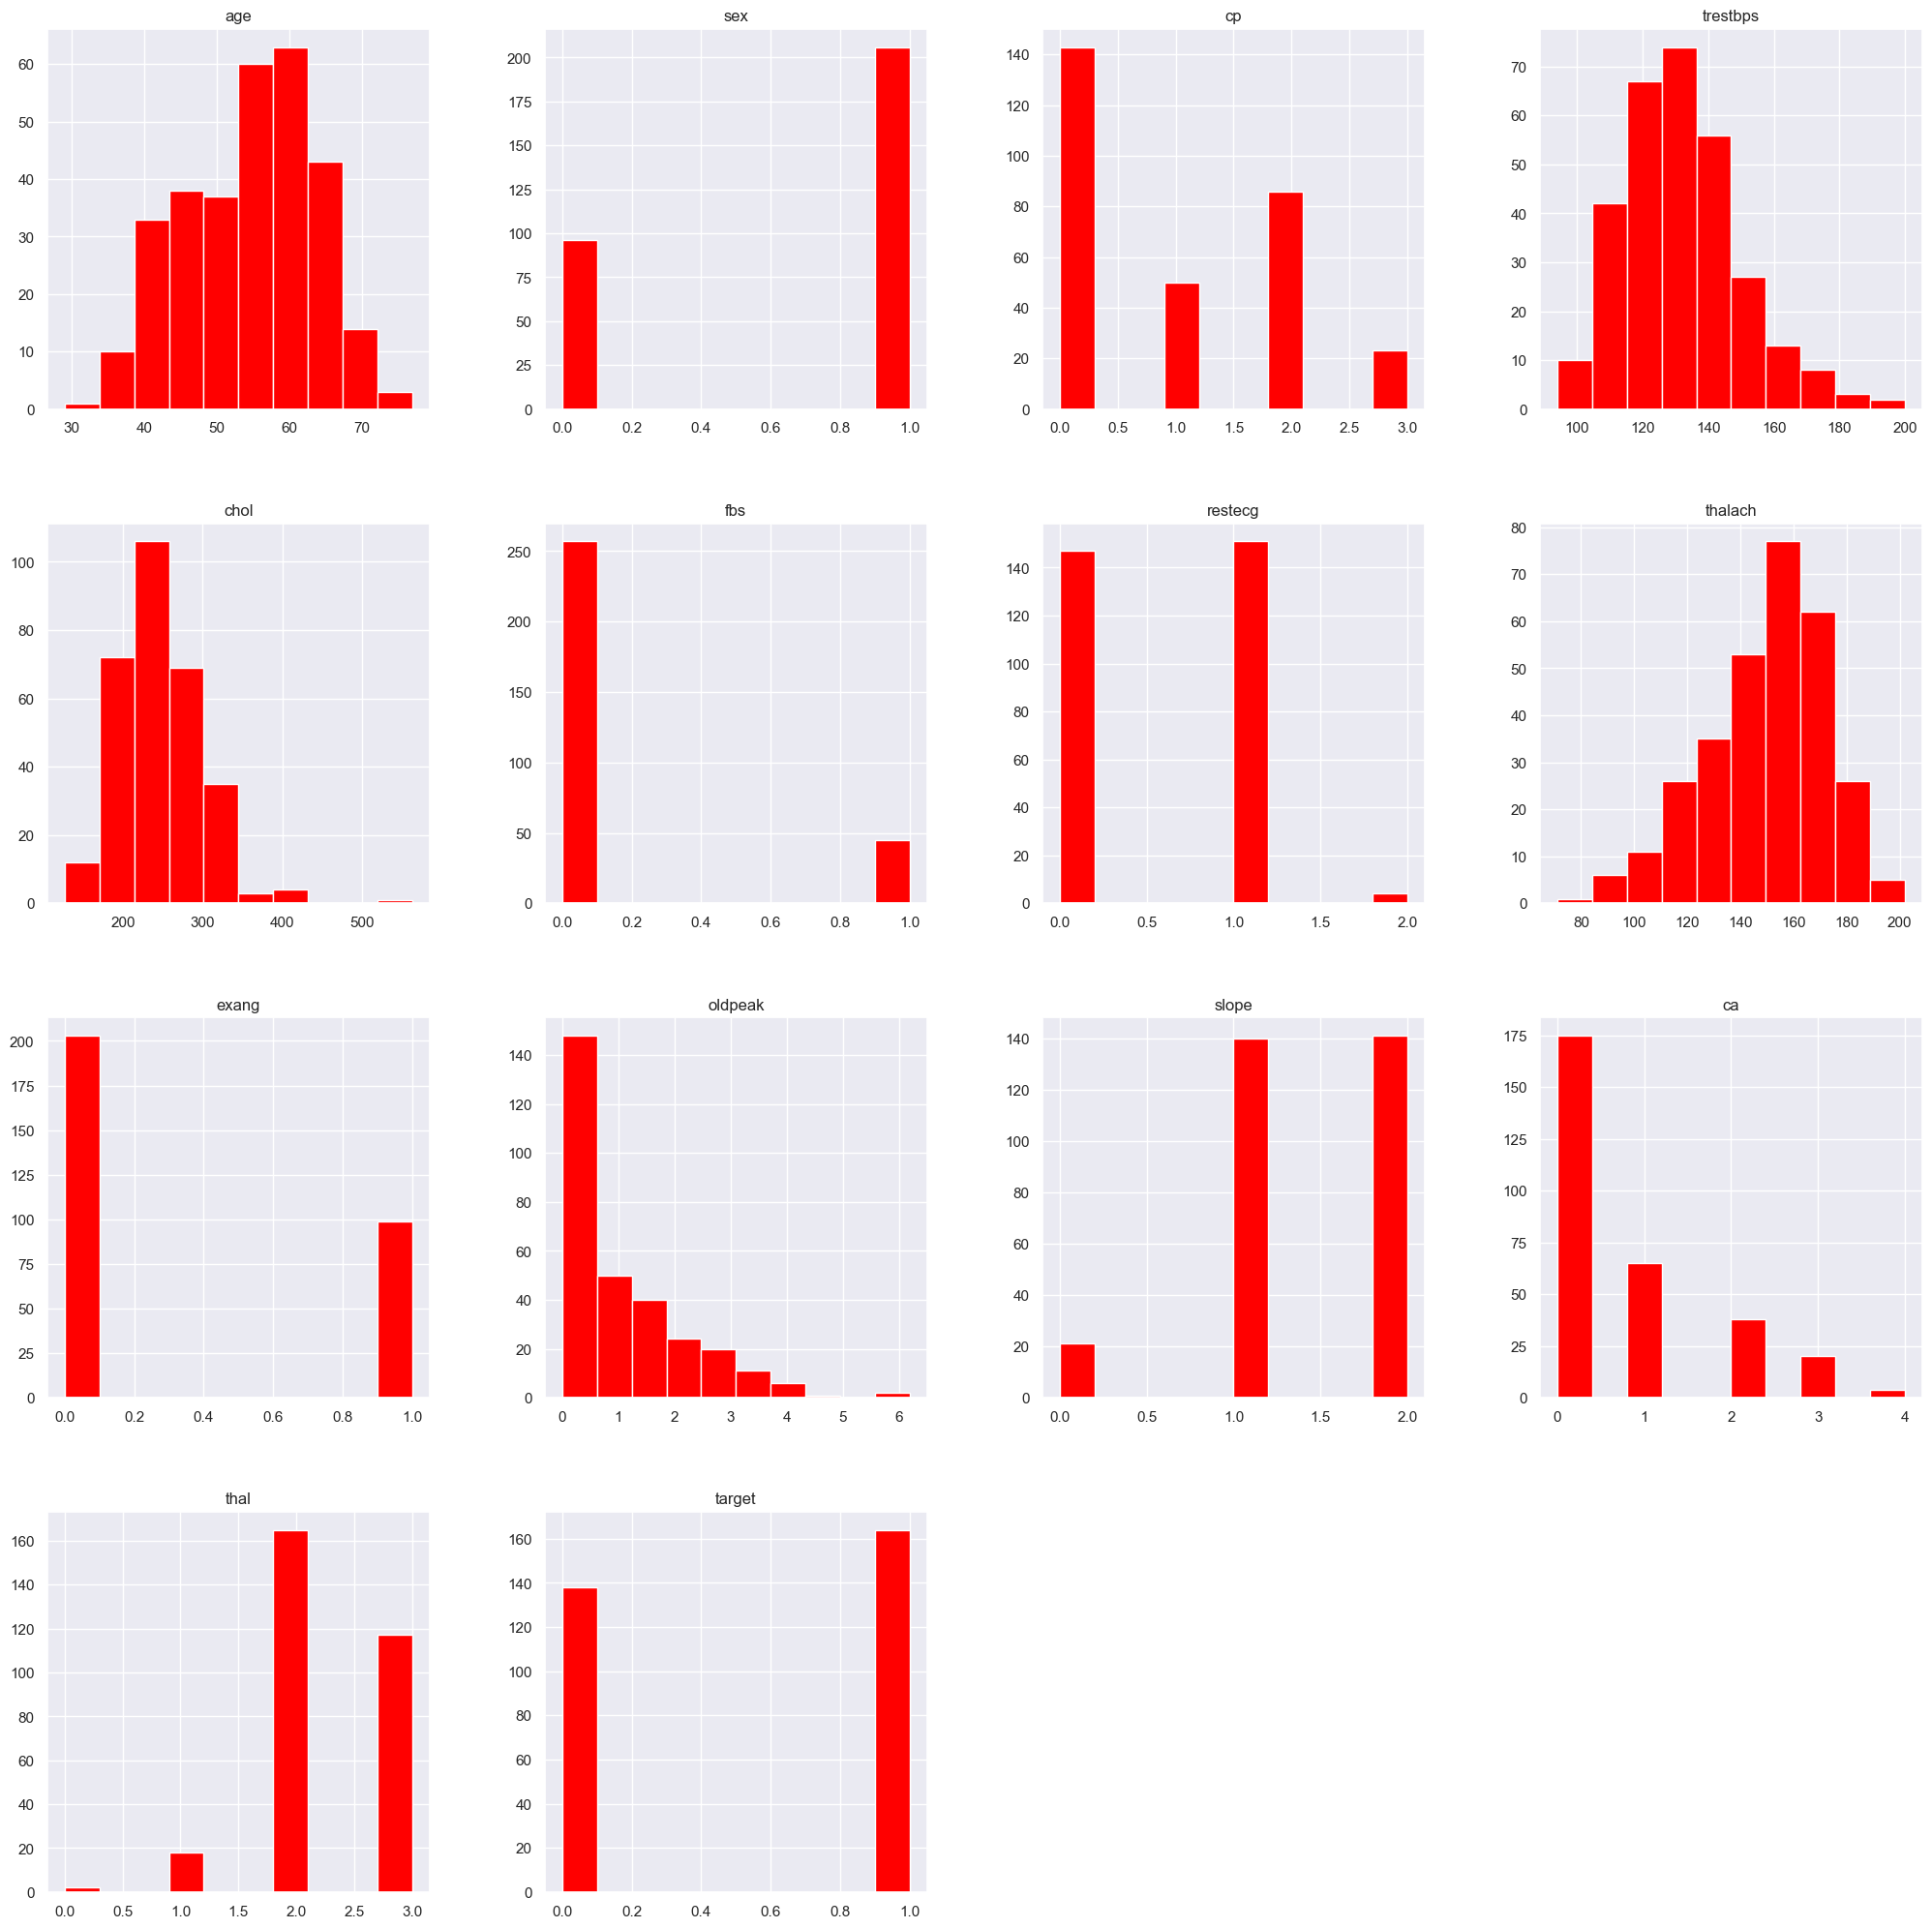

In [29]:
df.hist(figsize = (25, 25), color = 'Red')

In [30]:
sns.pairplot(df, height = 8)

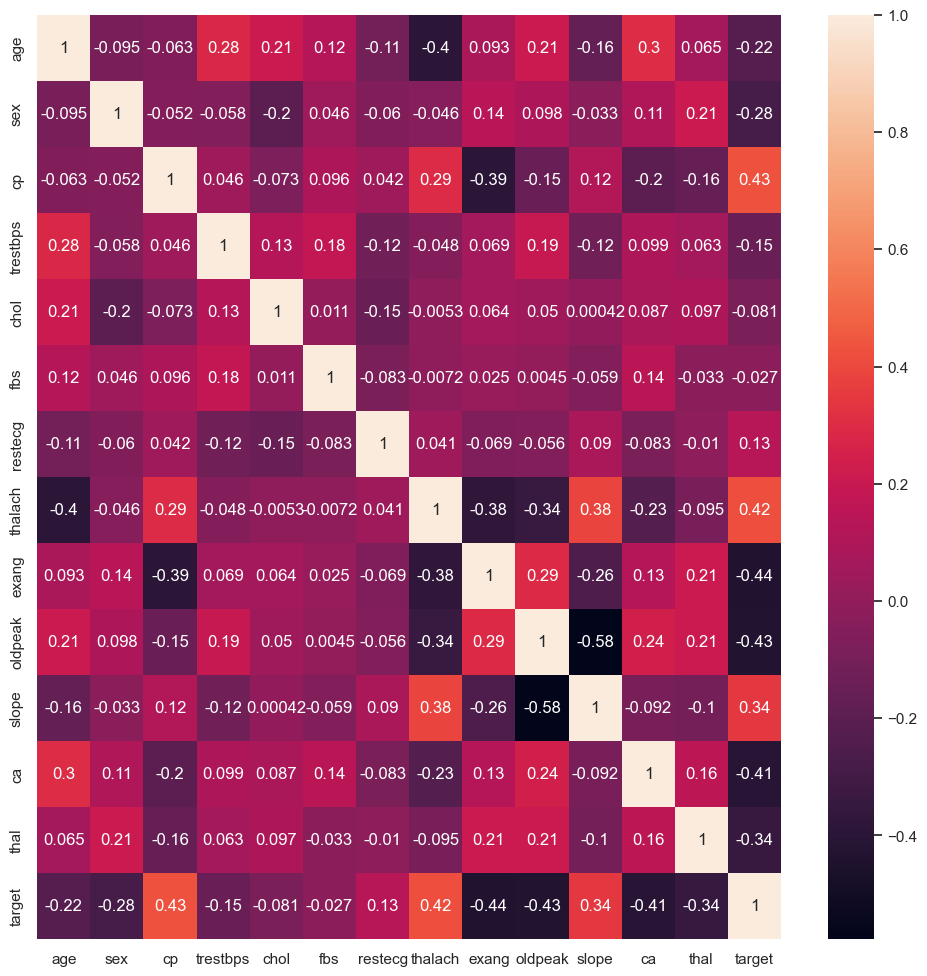

In [32]:
sns.set()
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True)
plt.show()

Now split dataset into x and y variables.

In [33]:
x = df.drop(columns = 'target', axis = 1)
y = df['target']

In [34]:
x.sample(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3


In [35]:
y.sample(2)

118    1
63     1
Name: target, dtype: int64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 5)

In [43]:
print(x_train.shape)
print("x_train dataset has 241 rows and 13 columns.")
print(y_train.shape)
print("y_train dataset has 241 rows.")
print(x_test.shape)
print("x_test dataset has 61 rows and 13 columns.")
print(y_test.shape)
print("y_test dataset has 61 rows.")

(241, 13)
x_train dataset has 241 rows and 13 columns.
(241,)
y_train dataset has 241 rows.
(61, 13)
x_test dataset has 61 rows and 13 columns.
(61,)
y_test dataset has 61 rows.


In [45]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [46]:
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [47]:
x_train = pd.DataFrame(x_train ,columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])
x_test = pd.DataFrame(x_test ,columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [48]:
x_train.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
139,-1.236305,0.68521,-0.961533,-0.665243,-1.301119,-0.432657,-1.023230,-1.428177,1.547374,1.304981,-0.644607,-0.709308,1.186179
183,0.287177,0.68521,1.010633,1.072996,-1.468594,-0.432657,0.888385,1.025136,-0.646256,0.514558,0.956943,-0.709308,-0.475851
95,0.722457,0.68521,-0.961533,0.377700,-1.505811,-0.432657,-1.023230,-1.201019,1.547374,2.271053,-0.644607,0.261961,-0.475851


In [49]:
x_test.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
54,0.722457,-1.459407,-0.961533,0.783289,1.117969,-0.432657,-1.023230,-0.246952,1.547374,-0.012390,-0.644607,-0.709308,1.186179
9,0.504817,0.685210,1.996716,2.231821,0.764410,-0.432657,-1.023230,0.343660,-0.646256,-0.714988,-0.644607,-0.709308,1.186179
38,0.504817,0.685210,1.996716,0.145935,-0.798693,-0.432657,0.888385,0.479955,-0.646256,-0.188040,0.956943,1.233229,-0.475851


In [52]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [56]:
x_train_prediction = lr.predict(x_train)
x_train_accuracy_score = accuracy_score(y_train, x_train_prediction)
print("Accuracy score for training data : ", x_train_accuracy_score)

Accuracy score for training data :  0.8464730290456431


In [57]:
x_test_prediction = lr.predict(x_test)
x_test_accuracy_score = accuracy_score(y_test, x_test_prediction)
print("Accuracy score for testing data : ", x_test_accuracy_score)

Accuracy score for testing data :  0.819672131147541


In [62]:
input_data = (41, 1, 1, 120, 157, 0, 1, 182, 0, 0.0, 2, 0, 2)
input_array = np.asarray(input_data).reshape(1, -1)
data_prediction = lr.predict(input_array)
data_prediction

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)